<a href="https://colab.research.google.com/github/SHREYANSH-BARDIA/Deep_Learners_Recursion2.0/blob/main/Problem_Statement_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Recursion 2.0/heart.csv')

# Exploratory Data Analysis

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Statistical summary of the dataset
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking for null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

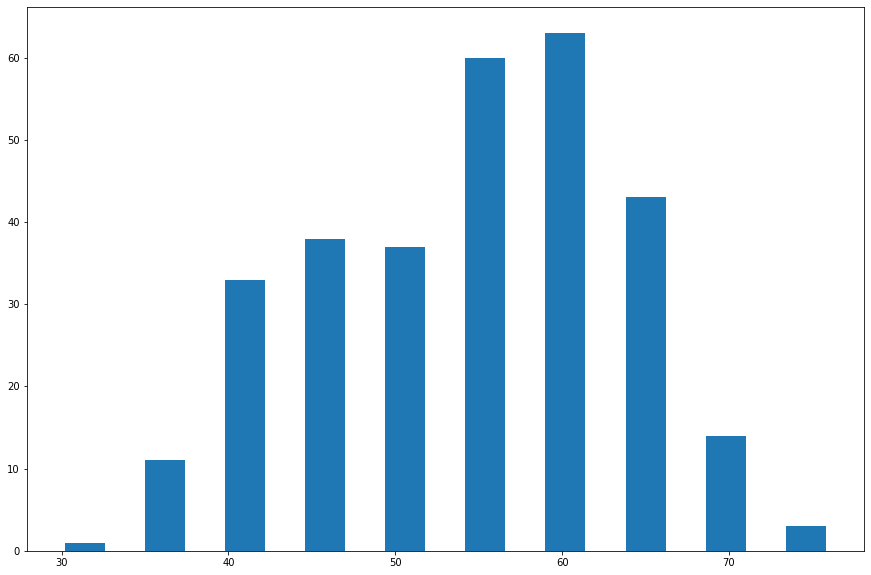

In [ ]:
# Distribution of age
plt.hist(data['age'],bins=10,rwidth=0.5)
plt.show()

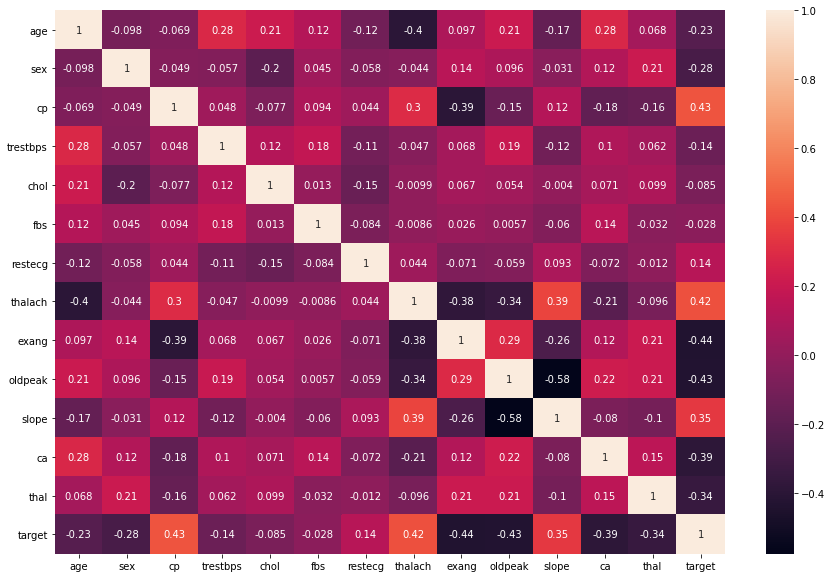

In [ ]:
# Checking the correlation between the target variable and other features in the dataset
sns.heatmap(data.corr(),annot=True)

The features 'chol' and 'fbs' have relatively weaker correlation with the target feature

There are some columns like 'sex','cp','fbs','restecg','exang','slope','ca'and 'thal' which are of categorical data type but they are present in the dataset as numeric values. Hence, these features will have to be converted to categorical data type

In [ ]:
data['sex'] = data['sex'].astype('str')
data['cp'] = data['cp'].astype('str')
data['fbs'] = data['fbs'].astype('str')
data['restecg'] = data['restecg'].astype('str')
data['exang'] = data['exang'].astype('str')
data['slope'] = data['slope'].astype('str')
data['ca'] = data['ca'].astype('str')
data['thal'] = data['thal'].astype('str')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


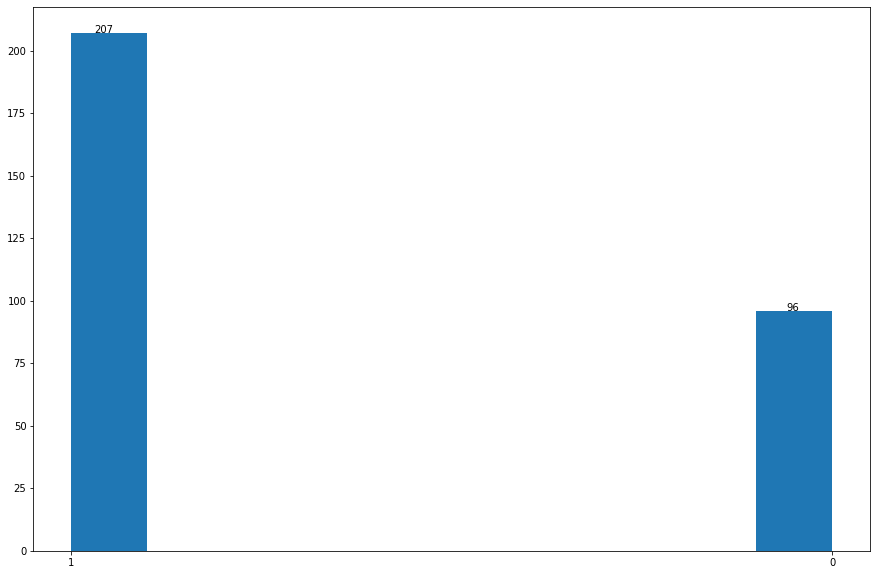

In [ ]:
plt.hist(data['sex'])
plt.text(0.03,207,'207')
plt.text(0.94,96,'96')
plt.show()

There are 207 male and 96 female patients in the dataset

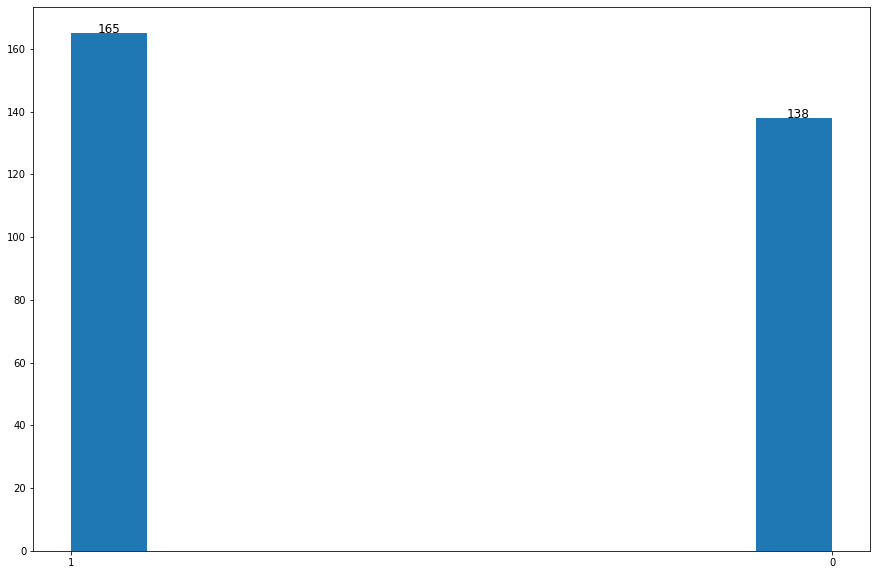

In [ ]:
plt.hist(data['target'].astype('str'))
plt.text(0.94,138,'138',fontsize=12)
plt.text(0.035,165,'165',fontsize=12)

plt.show()

In the given dataset there are 165 patients who have more chance of getting a heart attack  
and 138 patients who have less/no chance of getting a heart attack

### Exploring categorical variables

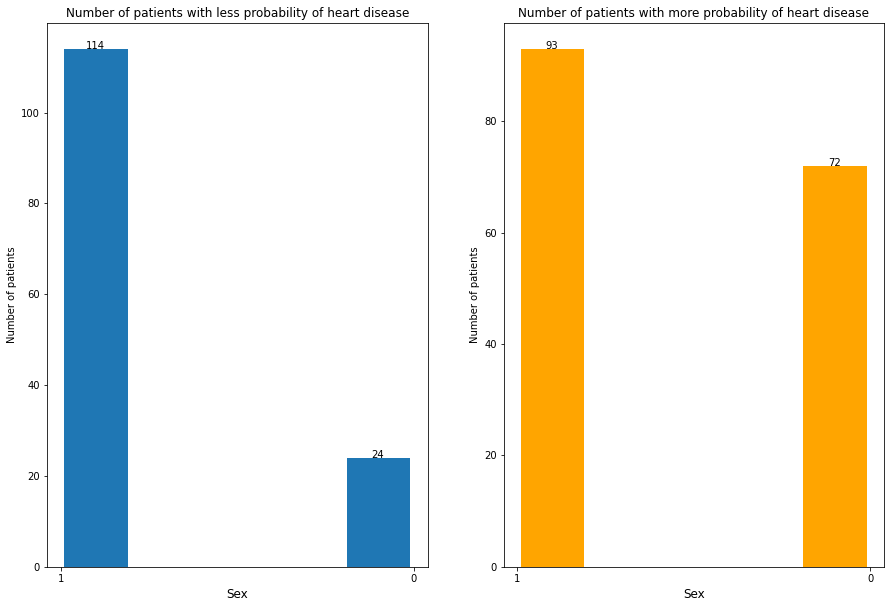

In [ ]:
# Sex vs target
fig,axs = plt.subplots(1,2)

axs[0].hist(data['sex'][data['target']==0],bins=5,rwidth=0.9,align='mid')
axs[0].set_xlabel('Sex',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of patients with less probability of heart disease')
axs[0].text(0.88,24,'24')
axs[0].text(0.07,114,'114')



axs[1].hist(data['sex'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Sex',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of patients with more probability of heart disease')
axs[1].text(0.08,93,'93')
axs[1].text(0.88,72,'72')



plt.show()


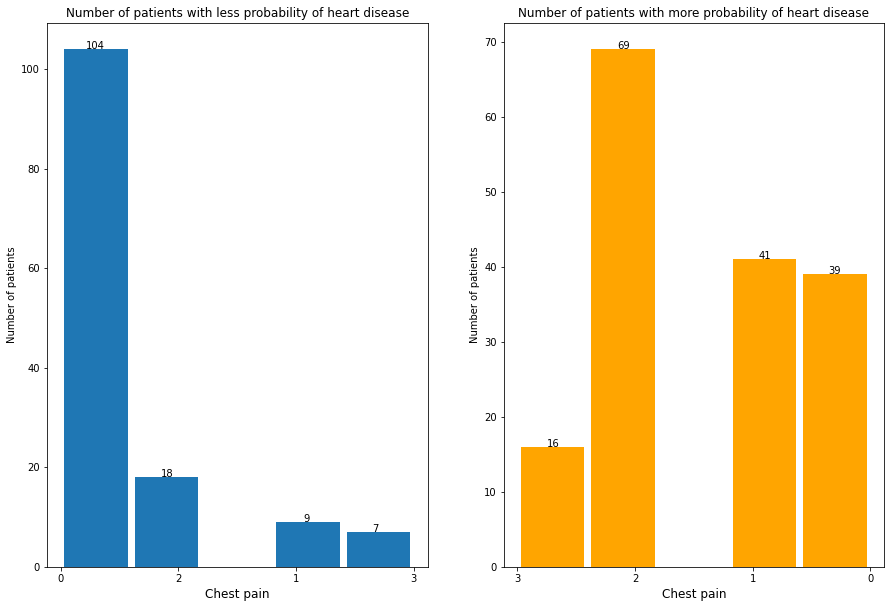

In [ ]:
# chest pain vs target

fig,axs = plt.subplots(1,2)

axs[0].hist(data['cp'][data['target']==0],bins=5,rwidth=0.9,align='mid')
axs[0].set_xlabel('Chest pain',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of patients with less probability of heart disease')
axs[0].text(0.21,104,'104')
axs[0].text(2.06,9,'9')
axs[0].text(0.85,18,'18')
axs[0].text(2.65,7,'7')

axs[1].hist(data['cp'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Chest pain',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of patients with more probability of heart disease')
axs[1].text(2.64,39,'39')
axs[1].text(2.05,41,'41')
axs[1].text(0.85,69,'69')
axs[1].text(0.25,16,'16')



plt.show()


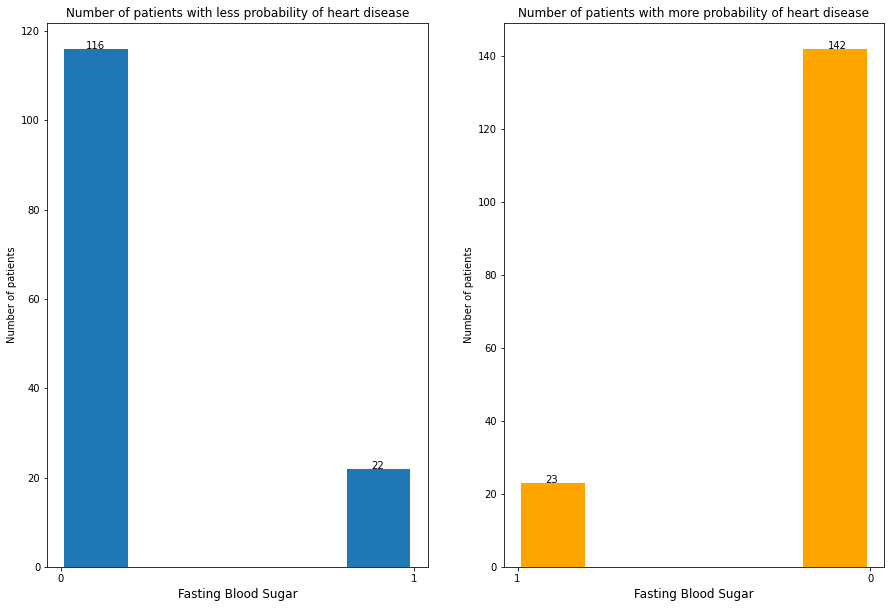

In [ ]:
# Floating blood sugar vs target

fig,axs = plt.subplots(1,2)

axs[0].hist(data['fbs'][data['target']==0],bins=5,rwidth=0.9,align='mid')
axs[0].set_xlabel('Fasting Blood Sugar',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of patients with less probability of heart disease')
axs[0].text(0.07,116,'116')
axs[0].text(0.88,22,'22')

axs[1].hist(data['fbs'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Fasting Blood Sugar',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of patients with more probability of heart disease')
axs[1].text(0.08,23,'23')
axs[1].text(0.88,142,'142')

plt.show()


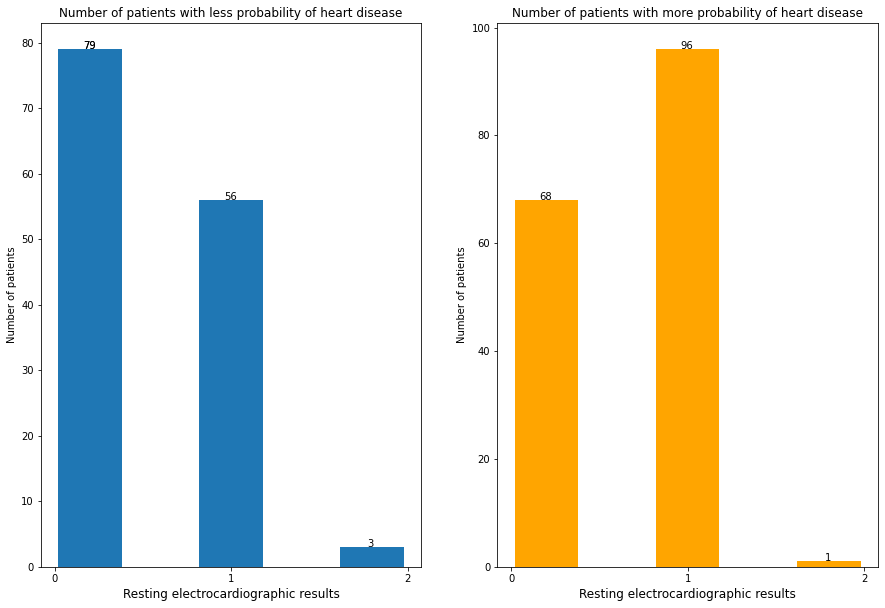

In [ ]:
# Resting electrocardiographic results vs target

fig,axs = plt.subplots(1,2)

axs[0].hist(data['restecg'][data['target']==0],bins=5,rwidth=0.9,align='mid')
axs[0].set_xlabel('Resting electrocardiographic results',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of patients with less probability of heart disease')
axs[0].text(0.16,79,'79')
axs[0].text(0.16,79,'79')
axs[0].text(0.96,56,'56')
axs[0].text(1.77,3,'3')

axs[1].hist(data['restecg'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Resting electrocardiographic results',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of patients with more probability of heart disease')
axs[1].text(0.16,68,'68')
axs[1].text(0.96,96,'96')
axs[1].text(1.78,1,'1')



plt.show()


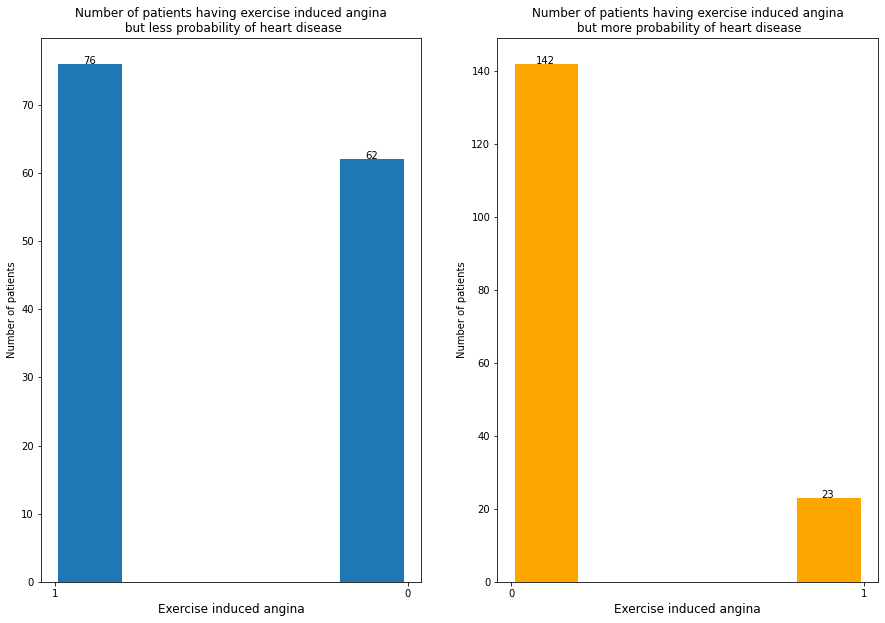

In [ ]:
# exercise induced angina vs target

fig,axs = plt.subplots(1,2)

axs[0].hist(data['exang'][data['target']==0],bins=5,rwidth=0.9,align='mid')
axs[0].set_xlabel('Exercise induced angina',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of patients having exercise induced angina\n but less probability of heart disease')
axs[0].text(0.88,62,'62')
axs[0].text(0.08,76,'76')

axs[1].hist(data['exang'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Exercise induced angina',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of patients having exercise induced angina\n but more probability of heart disease')
axs[1].text(0.88,23,'23')
axs[1].text(0.07,142,'142')



plt.show()

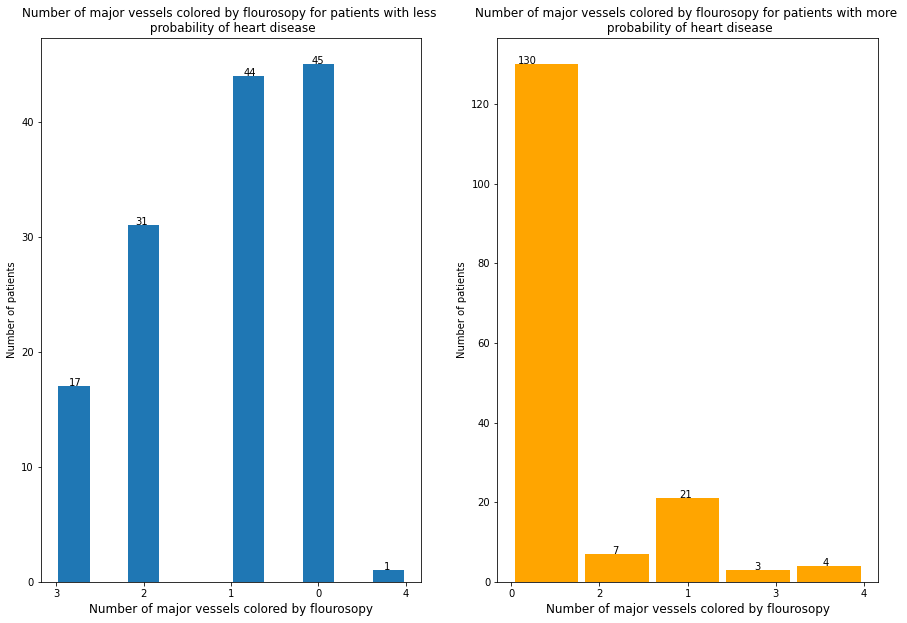

In [ ]:
# Number of major vessels colored by flourosopy vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].hist(data['ca'][data['target']==0],rwidth=0.9,align='mid')
axs[0].set_xlabel('Number of major vessels colored by flourosopy',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Number of major vessels colored by flourosopy for patients with less \n probability of heart disease')
axs[0].text(0.14,17,'17')
axs[0].text(0.9,31,'31')
axs[0].text(2.14,44,'44')
axs[0].text(2.92,45,'45')
axs[0].text(3.75,1,'1')

axs[1].hist(data['ca'][data['target']==1],bins=5,rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Number of major vessels colored by flourosopy',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Number of major vessels colored by flourosopy for patients with more \n probability of heart disease')
axs[1].text(0.08,130,'130')
axs[1].text(1.9,21,'21')
axs[1].text(1.15,7,'7')
axs[1].text(2.75,3,'3')
axs[1].text(3.53,4,'4')



plt.show()


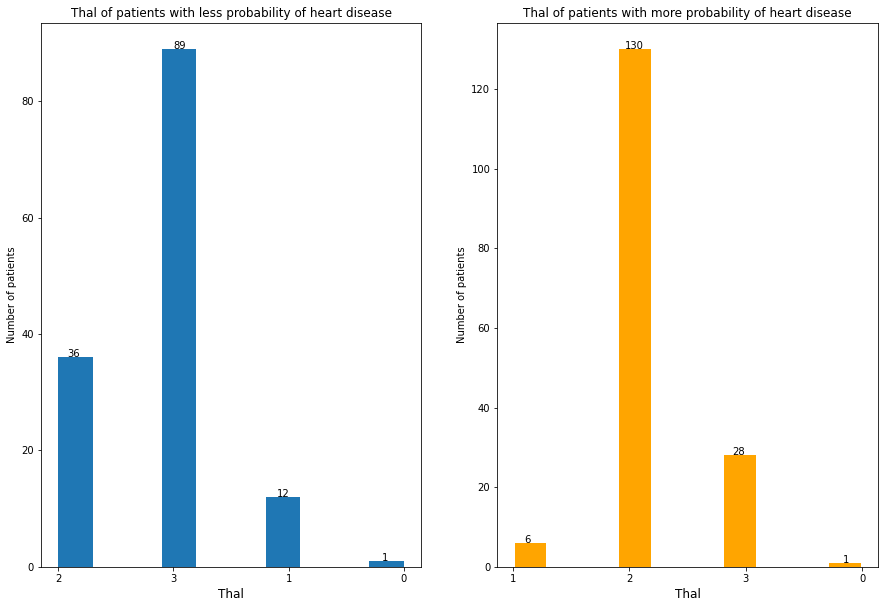

In [ ]:
# Thal vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].hist(data['thal'][data['target']==0],align='mid')
axs[0].set_xlabel('Thal',fontsize=12)
axs[0].set_ylabel('Number of patients')
axs[0].set_title('Thal of patients with less probability of heart disease')
axs[0].text(0.08,36,'36')
axs[0].text(1,89,'89')
axs[0].text(1.9,12,'12')
axs[0].text(2.81,1,'1')

axs[1].hist(data['thal'][data['target']==1],rwidth=0.9,align='mid',color='orange')
axs[1].set_xlabel('Thal',fontsize=12)
axs[1].set_ylabel('Number of patients')
axs[1].set_title('Thal of patients with more probability of heart disease')
axs[1].text(0.098,6,'6')
axs[1].text(0.96,130,'130')
axs[1].text(1.88,28,'28')
axs[1].text(2.83,1,'1')



plt.show()


### Exploring continuous variables

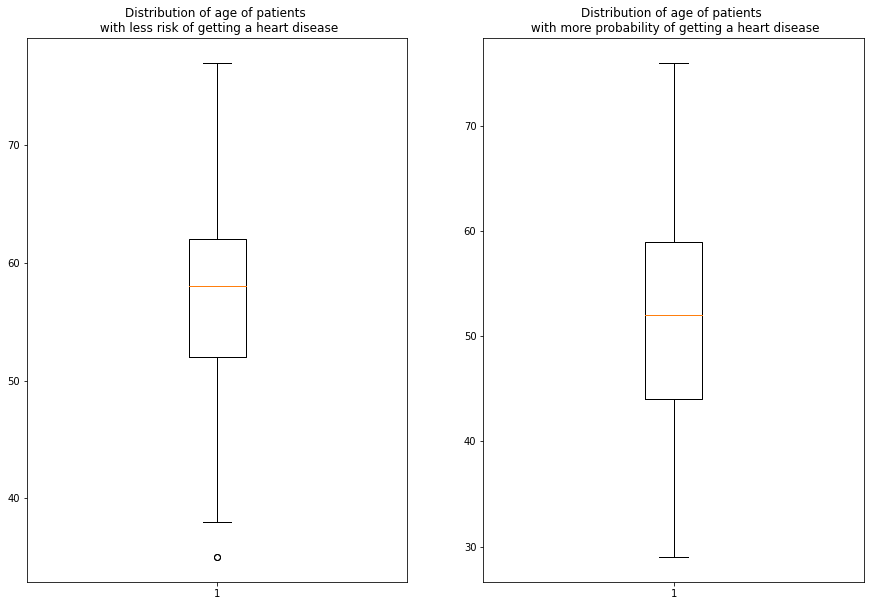

In [ ]:
# age vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].boxplot(data['age'][data['target']==0])
axs[0].set_title('Distribution of age of patients \n with less risk of getting a heart disease')
axs[1].boxplot(data['age'][data['target']==1])
axs[1].set_title('Distribution of age of patients \n with more probability of getting a heart disease')

plt.show()

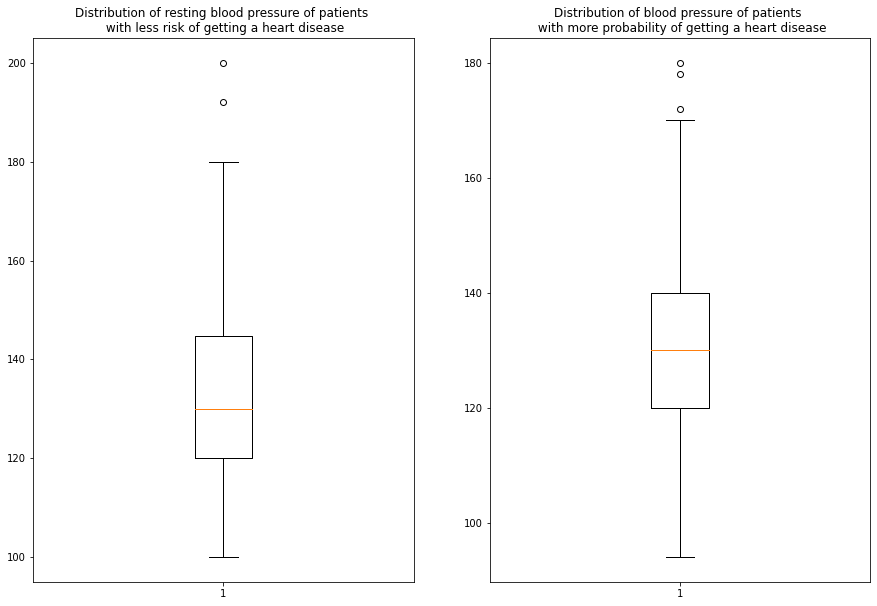

In [ ]:
# Resting blood pressure vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].boxplot(data['trestbps'][data['target']==0])
axs[0].set_title('Distribution of resting blood pressure of patients \n with less risk of getting a heart disease')

axs[1].boxplot(data['trestbps'][data['target']==1])
axs[1].set_title('Distribution of blood pressure of patients \n with more probability of getting a heart disease')


plt.show()

134.3985507246377

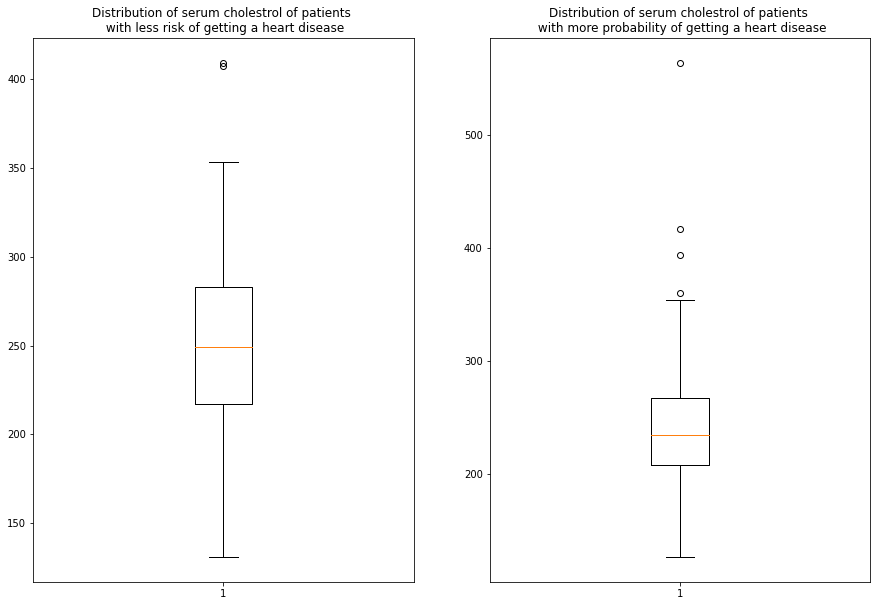

In [ ]:
# serum cholesterol vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].boxplot(data['chol'][data['target']==0])
axs[0].set_title('Distribution of serum cholestrol of patients \n with less risk of getting a heart disease')

axs[1].boxplot(data['chol'][data['target']==1])
axs[1].set_title('Distribution of serum cholestrol of patients \n with more probability of getting a heart disease')


plt.show()

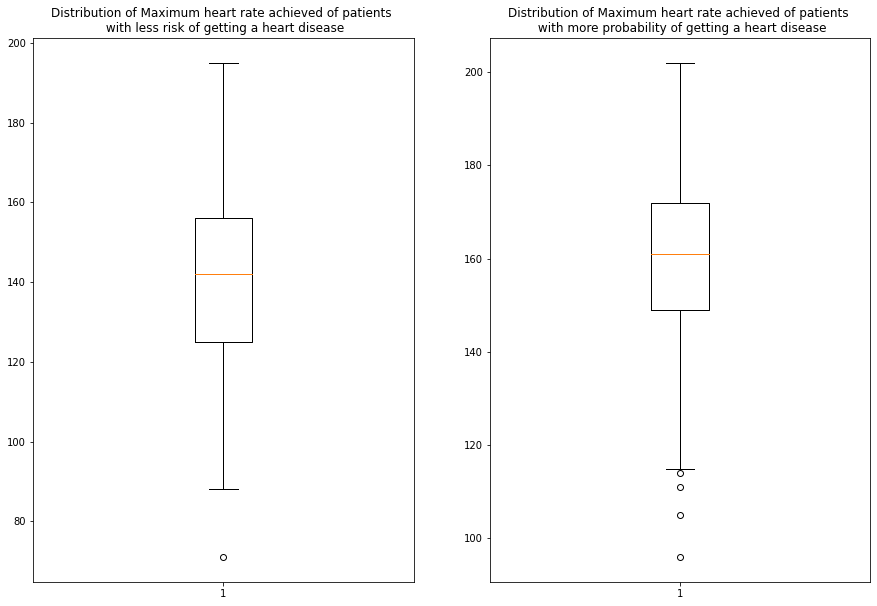

In [ ]:
# Maximum heart rate achieved vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].boxplot(data['thalach'][data['target']==0])
axs[0].set_title('Distribution of Maximum heart rate achieved of patients \n with less risk of getting a heart disease')

axs[1].boxplot(data['thalach'][data['target']==1])
axs[1].set_title('Distribution of Maximum heart rate achieved of patients \n with more probability of getting a heart disease')

plt.show()

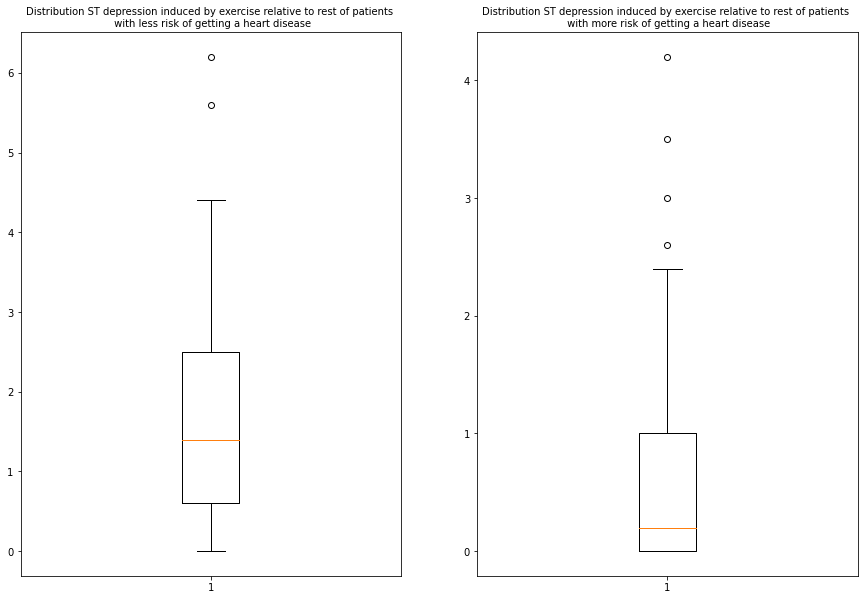

In [ ]:
# Distribution ST depression induced by exercise relative to rest vs target

plt.rcParams['figure.figsize']=(15,10)
fig,axs = plt.subplots(1,2)

axs[0].boxplot(data['oldpeak'][data['target']==0])
axs[0].set_title('Distribution ST depression induced by exercise relative to rest of patients \n with less risk of getting a heart disease',fontsize=10)

axs[1].boxplot(data['oldpeak'][data['target']==1])
axs[1].set_title('Distribution ST depression induced by exercise relative to rest of patients \n with more risk of getting a heart disease',fontsize=10)

plt.show()

# Modelling

In [ ]:
features = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']]
features2 = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal','fbs','chol']]

target = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 11)
(61, 11)
(242,)
(61,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier

dlc = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [ ]:
rfc = rfc(criterion='gini',max_features = 'log2',n_estimators = 200,max_depth = 50)
rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfc.predict(x_test)

In [ ]:
pred = pred.reshape((-1,1))

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape((-1,1))

In [ ]:
from sklearn.metrics import accuracy_score as acc,classification_report

In [ ]:
acc1 = acc(y_test,pred)

In [ ]:
acc1

0.8524590163934426

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### DecisionTreeClassifier

In [ ]:
dlc.fit(x_train,y_train)
pred = dlc.predict(x_test)

In [ ]:
dlc.score(x_test,y_test)

0.7704918032786885

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(features2,target,test_size=0.2,random_state=0)


In [ ]:
# rfc = rfc(criterion='gini',max_features = 'log2',n_estimators = 200,max_depth = 50)
rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfc.predict(x_test)

In [ ]:
pred = pred.reshape((-1,1))

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape((-1,1))

In [ ]:
from sklearn.metrics import accuracy_score as acc,classification_report

In [ ]:
acc1 = acc(y_test,pred)

In [ ]:
acc1

0.9016393442622951

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
dlc.fit(x_train2,y_train2)
pred = dlc.predict(x_test2)

In [ ]:
dlc.score(x_test2,y_test2)

0.819672131147541